# Word2Vec

In [1]:
text = 'you will never know until you try'

In [2]:
tokens = text.split()

In [3]:
tokens

['you', 'will', 'never', 'know', 'until', 'you', 'try']

In [87]:
# 순서 유지 Unique_Token
from collections import OrderedDict
categories = list(OrderedDict((element, None) for element in tokens))

In [13]:
X = np.array(tokens).reshape(-1,1)

In [132]:
X

array([['you'],
       ['will'],
       ['never'],
       ['know'],
       ['until'],
       ['you'],
       ['try']], dtype='<U5')

In [138]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore'

In [140]:
enc.categories_
word_vec = enc.transform(X).toarray().T
word_vec
data = pd.DataFrame(word_vec, index = enc.categories_)
final_vec = np.matrix(data.T[categories])
final_vec

[array(['know', 'never', 'try', 'until', 'will', 'you'], dtype='<U5')]

matrix([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.]])

In [222]:
# Window 사이즈에 따른 Train Data 생성

# t = window size
def mktraindata(x, t):
    X_data = []
    y_data = []
    for i in range(len(x)):
        for j in range(i-t, i+t+1):
            if j < 0 :
                j = -1
                continue
            if j >= len(x):
                break
            if j != i:
                X_data.append(x[j].getA1())
                y_data.append(x[i].getA1())

    return np.matrix(X_data), np.matrix(y_data)

X_data, y_data = mktraindata(final_vec, 2)

In [228]:
# Hidden Node 수 (차원 수)
H = 4

# Weight (단어벡터)
weight = np.random.random(size = (len(categories), H))

hidden = np.dot(X_data, weight)

In [229]:
weight

array([[0.02211893, 0.42630455, 0.4209864 , 0.61867277],
       [0.54875014, 0.42546305, 0.14392968, 0.58884411],
       [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
       [0.0609407 , 0.6476459 , 0.46624978, 0.6952509 ],
       [0.22956236, 0.95915625, 0.15054935, 0.90198759],
       [0.61908603, 0.0761448 , 0.62405448, 0.30307234]])

In [230]:
hidden

matrix([[0.54875014, 0.42546305, 0.14392968, 0.58884411],
        [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
        [0.02211893, 0.42630455, 0.4209864 , 0.61867277],
        [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
        [0.0609407 , 0.6476459 , 0.46624978, 0.6952509 ],
        [0.02211893, 0.42630455, 0.4209864 , 0.61867277],
        [0.54875014, 0.42546305, 0.14392968, 0.58884411],
        [0.0609407 , 0.6476459 , 0.46624978, 0.6952509 ],
        [0.22956236, 0.95915625, 0.15054935, 0.90198759],
        [0.54875014, 0.42546305, 0.14392968, 0.58884411],
        [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
        [0.22956236, 0.95915625, 0.15054935, 0.90198759],
        [0.02211893, 0.42630455, 0.4209864 , 0.61867277],
        [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
        [0.0609407 , 0.6476459 , 0.46624978, 0.6952509 ],
        [0.02211893, 0.42630455, 0.4209864 , 0.61867277],
        [0.61908603, 0.0761448 , 0.62405448, 0.30307234],
        [0.060

In [231]:
h_weight = np.random.random(size = (H, len(categories)))

In [232]:
h_weight

array([[0.06612453, 0.8997787 , 0.08803106, 0.82032854, 0.46234574,
        0.04382569],
       [0.01938367, 0.68271673, 0.22233605, 0.39805634, 0.45472812,
        0.4567216 ],
       [0.28349581, 0.23045068, 0.93611008, 0.31076321, 0.48861083,
        0.35222468],
       [0.60177987, 0.52063727, 0.98086305, 0.02832953, 0.52906135,
        0.64855825]])

In [233]:
output = np.dot(hidden, h_weight)

In [234]:
output

matrix([[0.43969087, 1.12396731, 0.85521228, 0.6809234 , 0.82904256,
         0.6509628 ],
        [0.48238199, 0.89177822, 0.9859485 , 0.38180275, 0.7681516 ,
         0.79775443],
        [0.50137865, 0.73006809, 1.09765289, 0.33619181, 0.73709362,
         0.745199  ],
        [0.48238199, 0.89177822, 0.9859485 , 0.38180275, 0.7681516 ,
         0.79775443],
        [0.56715128, 0.96641294, 1.26776674, 0.47238036, 0.91832354,
         0.91360002],
        [0.50137865, 0.73006809, 1.09765289, 0.33619181, 0.73709362,
         0.745199  ],
        [0.43969087, 1.12396731, 0.85521228, 0.6809234 , 0.82904256,
         0.6509628 ],
        [0.56715128, 0.96641294, 1.26776674, 0.47238036, 0.91832354,
         0.91360002],
        [0.61924975, 1.36568989, 1.25912069, 0.64245287, 1.09305931,
         1.08614679],
        [0.43969087, 1.12396731, 0.85521228, 0.6809234 , 0.82904256,
         0.6509628 ],
        [0.48238199, 0.89177822, 0.9859485 , 0.38180275, 0.7681516 ,
         0.79775443],

In [235]:
def softmax(a) :
    return np.exp(a) / np.sum(np.exp(a))

In [253]:
result = np.matrix(list(map(softmax, output[:,].getA())))

In [255]:
result

matrix([[0.11790247, 0.23372243, 0.17864118, 0.15006827, 0.17402683,
         0.14563882],
        [0.12875996, 0.1939007 , 0.21304777, 0.11643937, 0.17135193,
         0.17650026],
        [0.13401308, 0.16844796, 0.24327966, 0.11360762, 0.16963556,
         0.17101611],
        [0.12875996, 0.1939007 , 0.21304777, 0.11643937, 0.17135193,
         0.17650026],
        [0.12121114, 0.18069232, 0.24423955, 0.11025139, 0.17220856,
         0.17139704],
        [0.13401308, 0.16844796, 0.24327966, 0.11360762, 0.16963556,
         0.17101611],
        [0.11790247, 0.23372243, 0.17864118, 0.15006827, 0.17402683,
         0.14563882],
        [0.12121114, 0.18069232, 0.24423955, 0.11025139, 0.17220856,
         0.17139704],
        [0.10833854, 0.22853767, 0.20543545, 0.11088172, 0.17400264,
         0.17280399],
        [0.11790247, 0.23372243, 0.17864118, 0.15006827, 0.17402683,
         0.14563882],
        [0.12875996, 0.1939007 , 0.21304777, 0.11643937, 0.17135193,
         0.17650026],

In [264]:
y_data.shape

(22, 6)

In [266]:
result.shape

(22, 6)

In [273]:
loss = -np.multiply(y_data, np.log(result)).sum()

In [274]:
loss

40.88144967391233

In [291]:
temp = (result-y_data).dot(h_weight.T)
w_grad = X_data.T.dot(temp)
h_grad = hidden.T.dot(result-y_data)

In [288]:
# weight 업데이트

r = 0.03
weight -= r*w_grad
h_weight -= r*h_grad

array([[0.02211893, 0.42630455, 0.4209864 , 0.61867277],
       [0.54875014, 0.42546305, 0.14392968, 0.58884411],
       [0.07324909, 0.6236108 , 0.17339457, 0.69177113],
       [0.0609407 , 0.6476459 , 0.46624978, 0.6952509 ],
       [0.22956236, 0.95915625, 0.15054935, 0.90198759],
       [0.61908603, 0.0761448 , 0.62405448, 0.30307234]])

In [ ]:
from collections import OrderedDict
categories = list(OrderedDict((element, None) for element in tokens))

In [292]:

weight = np.random.random(size = (len(categories), H))
h_weight = np.random.random(size = (H, len(categories)))

epocks = 10000
r = 0.03

loss_history = []
for epock in range(epocks):
    hidden = np.dot(X_data, weight)
    output = np.dot(hidden, h_weight)
    result = np.matrix(list(map(softmax, output[:,].getA())))

    loss_history.append(-np.multiply(y_data, np.log(result)).sum())

    temp = (result-y_data).dot(h_weight.T)
    w_grad = X_data.T.dot(temp)
    h_grad = hidden.T.dot(result-y_data)

    # weight 업데이트
    weight -= r*w_grad
    h_weight -= r*h_grad

weight

array([[-0.9779249 ,  1.09915553,  0.09763811, -1.60907048],
       [-0.20796545,  1.76795426, -0.59837205,  3.35542916],
       [ 2.8213533 ,  1.14509549, -0.28644311, -0.05722058],
       [ 0.36728865,  0.78118192,  2.8604919 ,  0.8242549 ],
       [-1.11893775, -0.38788495, -1.54111862,  2.1425576 ],
       [ 2.44245287, -2.44017639,  2.07296036,  0.33897258]])

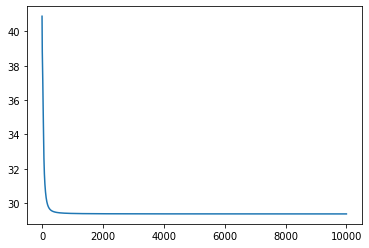

In [293]:
import matplotlib.pyplot as plt 

plt.plot(loss_history)

In [ ]:
text = 'you will never know until you try'

In [311]:
from collections import OrderedDict
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

# t = window size


X_data, y_data = mktraindata(final_vec, 2)

class Word2Vec():
    def __init__(self, H = 4, r = 0.03, t = 2):
        self.H = H
        self.r = r
        self.t = 2
        return

    def mkdatas(self, data):
        tokens = data.split()
        categories = list(OrderedDict((element, None) for element in tokens))
        X = np.array(tokens).reshape(-1,1)
        enc = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore'
        word_vec = enc.fit_transform(X).toarray().T
        df = pd.DataFrame(word_vec, index = enc.categories_)
        final_vec = np.matrix(df.T[categories])
        self.categories = categories
        X_data, y_data = mktraindata(final_vec, self.t)
        return X_data, y_data

    def fit(self, X_data, y_data):
        # Hidden Node 수 (차원 수), Learning Rate
        H, r = self.H, self.r

        # Weight (단어벡터)
        weight = np.random.random(size = (len(categories), H))
        hidden = np.dot(X_data, weight)

        # h_weight
        h_weight = np.random.random(size = (H, len(categories)))

        output = np.dot(hidden, h_weight)
        result = np.matrix(list(map(softmax, output[:,].getA())))
        
        loss_history = []
        loss_history.append(-np.multiply(y_data, np.log(result)).sum())

        epocks = 10000
        for epock in range(epocks):
            temp = (result-y_data).dot(h_weight.T)
            w_grad = X_data.T.dot(temp)
            h_grad = hidden.T.dot(result-y_data)

            # weight 업데이트
            weight -= r*w_grad
            h_weight -= r*h_grad
            
            hidden = np.dot(X_data, weight)
            output = np.dot(hidden, h_weight)
            result = np.matrix(list(map(softmax, output[:,].getA())))

            loss_history.append(-np.multiply(y_data, np.log(result)).sum())

        self.loss_history = loss_history
        return pd.DataFrame(weight, index = self.categories)

    def loss_graph(self):
        plt.plot(self.loss_history)
        plt.title('Loss')
        plt.show()

# t = window size
def mktraindata(x, t):
    X_data = []
    y_data = []
    for i in range(len(x)):
        for j in range(i-t, i+t+1):
            if j < 0 :
                j = -1
                continue
            if j >= len(x):
                break
            if j != i:
                X_data.append(x[j].getA1())
                y_data.append(x[i].getA1())

    return np.matrix(X_data), np.matrix(y_data)

def softmax(a):
    return np.exp(a) / np.sum(np.exp(a))

In [312]:
w2v = Word2Vec()

In [313]:
X_data, y_data = w2v.mkdatas(text)

In [314]:
w2v.fit(X_data, y_data)

,0,1,2,3
you,0.093412,0.205028,-1.196643,-1.821807
will,1.997284,-2.404555,1.634492,0.795594
never,1.004942,-0.266180,-2.053446,2.061249
know,2.406362,2.241948,1.274688,0.694931
until,-0.593653,-2.227849,1.764315,-0.039645
try,-1.132056,2.317210,0.524876,2.922986


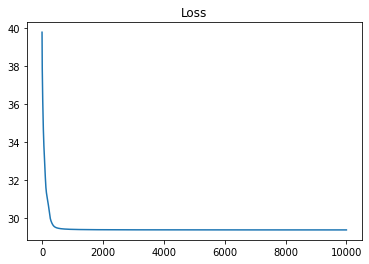

In [315]:
w2v.loss_graph()